In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from sklearn import linear_model

%matplotlib inline
plt.style.use('ggplot')

Read Data

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'data', 'adult.csv'))
df

,age,workclass,fnlwgt,education,education.num,...,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,...,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,...,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,...,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,...,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,...,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,...,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,...,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,...,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,...,0,0,40,United-States,<=50K


In [3]:
df.dropna(inplace = True)

Explore Data

In [4]:
df.shape

(32561, 15)

In [5]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education.num',
       u'marital.status', u'occupation', u'relationship', u'race', u'sex',
       u'capital.gain', u'capital.loss', u'hours.per.week', u'native.country',
       u'income'],
      dtype='object')

In [6]:
df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair', 'Transport-moving',
       'Handlers-cleaners', 'Sales', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [7]:
#df.drop('occupation' == '?')

In [8]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.var()

age               1.860614e+02
fnlwgt            1.114080e+10
education.num     6.618890e+00
capital.gain      5.454254e+07
capital.loss      1.623769e+05
hours.per.week    1.524590e+02
dtype: float64

Make Income & Sex Binary

In [10]:
df["income_binary"]=1

In [11]:
df.income_binary[df.income == "<=50K"] = 0

/Users/niloo_ga/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
df["sex_binary"]=1

In [13]:
df.sex_binary[df.sex == "Female"] = 0

/Users/niloo_ga/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
pd.crosstab(df.income_binary, df.sex)

sex,Female,Male
income_binary,,
0,9592,15128
1,1179,6662


In [15]:
pd.crosstab(df.income_binary, df.race)

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
income_binary,,,,,
0,275,763,2737,246,20699
1,36,276,387,25,7117


In [16]:
df.rename(columns = {'education.num': 'education_num',
                              'hours.per.week': 'hours'}, inplace = True)

In [17]:
df

,age,workclass,fnlwgt,education,education_num,...,hours,native.country,income,income_binary,sex_binary
0,90,?,77053,HS-grad,9,...,40,United-States,<=50K,0,0
1,82,Private,132870,HS-grad,9,...,18,United-States,<=50K,0,0
2,66,?,186061,Some-college,10,...,40,United-States,<=50K,0,0
3,54,Private,140359,7th-8th,4,...,40,United-States,<=50K,0,0
4,41,Private,264663,Some-college,10,...,40,United-States,<=50K,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,...,40,United-States,<=50K,0,1
32557,27,Private,257302,Assoc-acdm,12,...,38,United-States,<=50K,0,0
32558,40,Private,154374,HS-grad,9,...,40,United-States,>50K,1,1
32559,58,Private,151910,HS-grad,9,...,40,United-States,<=50K,0,0


Exploratory Analysis

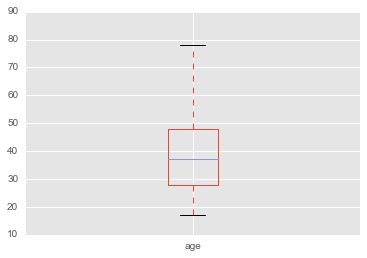

In [18]:
df.age.plot(kind = 'box')

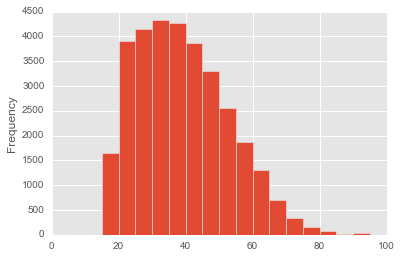

In [19]:
df.age.plot(kind = 'hist', range = (0, 100), bins = 20)

In [20]:
df.age.min()

17

In [21]:
df.age.max()

90

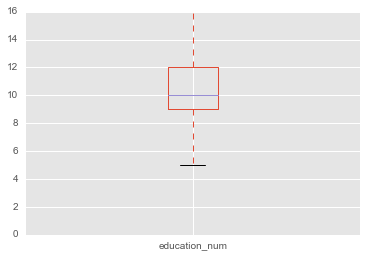

In [22]:
df.education_num.plot(kind = 'box')

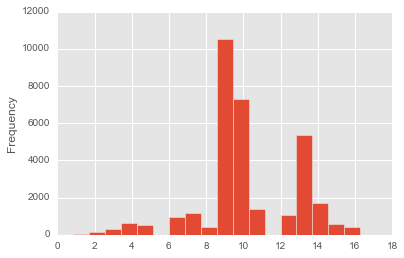

In [23]:
df.education_num.plot(kind = 'hist', range = (0, 18), bins = 21)

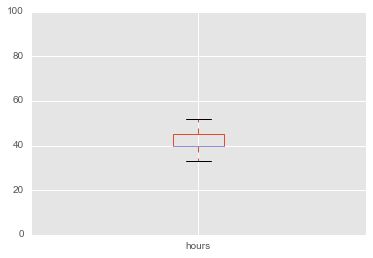

In [24]:
df.hours.plot(kind = 'box')

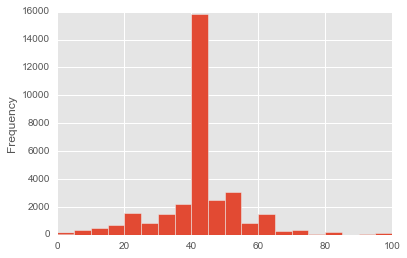

In [25]:
df.hours.plot(kind = 'hist', range = (0, 100), bins = 20)

In [26]:
df.hours.max()

99

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116173990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b826350>]], dtype=object)

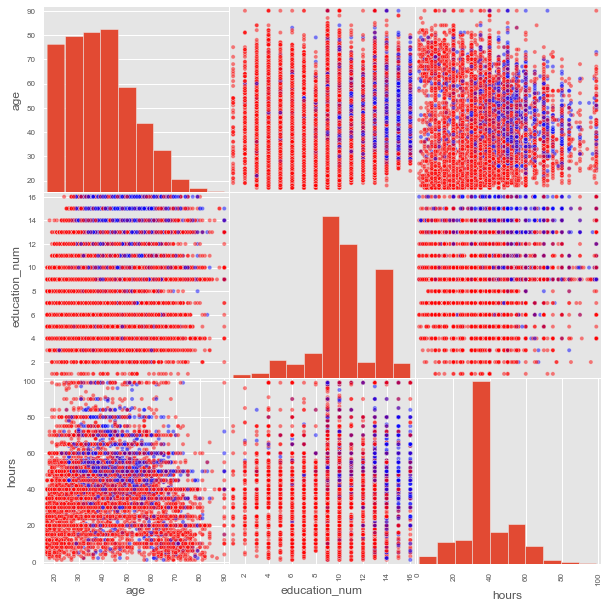

In [27]:
color_wheel = {"<=50K": "red",
               ">50K": "blue"}

color = df.income.map(color_wheel)

pd.tools.plotting.scatter_matrix(df[['age', 'education_num', 'hours']], c=color, s=70, figsize = (10,10))

QQ Plots for Normality

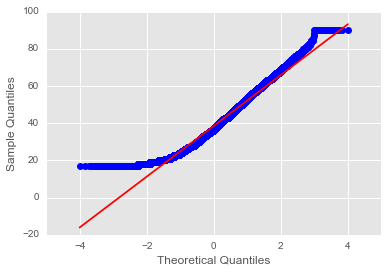

In [28]:
sm.qqplot(df.age, line = 's')

pass

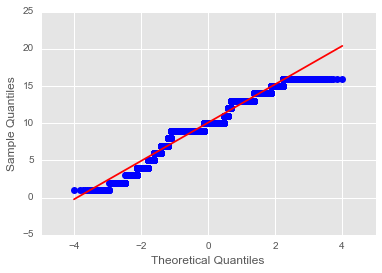

In [29]:
sm.qqplot(df.education_num, line = 's')

pass

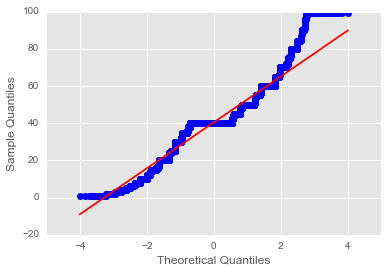

In [30]:
sm.qqplot(df.hours, line = 's')

pass